### import yolov5 and libraries


In [1]:
%cd yolov5

D:\learning\EE Courses\Deep learning (Dr.Hadadi)\TA\Exercise\Project\Final\yolov5


In [15]:
import cv2
from IPython.display import Image

## Plate Detection TEST

In [3]:
!python detect.py --source runs/img1.jpg --conf 0.3 --weights runs/plate-detection-weights.pt --save-txt --name 1

detect: weights=['runs/plate-detection-weights.pt'], source=runs/img1.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=1, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'D:\learning\EE': No such file or directory
YOLOv5  2022-6-28 Python-3.9.6 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20852934 parameters, 0 gradients
image 1/1 D:\learning\EE Courses\Deep learning (Dr.Hadadi)\TA\Exercise\Project\Final\yolov5\runs\img1.jpg: 416x640 1 license, Done. (0.025s)
Speed: 0.0ms pre-process, 24.9ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\1
1 labels saved to runs\detect\1\labels


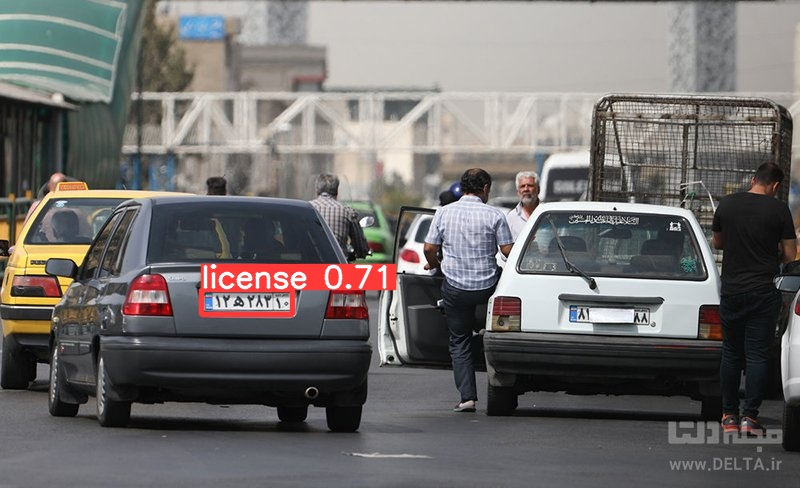

In [4]:
path = "D:/learning/EE Courses/Deep learning (Dr.Hadadi)/TA/Exercise/Project/Final/yolov5/runs/detect/"
Image(path + "1/img1.jpg")

## Plate Characters Detection TEST

In [5]:
!python detect.py --source runs/img2.jpg --conf 0.4 --weights runs/plate-char-detection-weights.pt --save-txt --name 2 --hide-conf

detect: weights=['runs/plate-char-detection-weights.pt'], source=runs/img2.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False
fatal: cannot change to 'D:\learning\EE': No such file or directory
YOLOv5  2022-6-28 Python-3.9.6 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20998410 parameters, 0 gradients
image 1/1 D:\learning\EE Courses\Deep learning (Dr.Hadadi)\TA\Exercise\Project\Final\yolov5\runs\img2.jpg: 384x640 5 1s, 1 2, 1 5, 1 23, Done. (0.022s)
Speed: 1.0ms pre-process, 22.0ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\2
1 labels saved to runs\detec

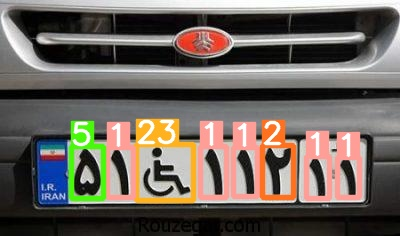

In [6]:
Image(path + "2/img2.jpg")

## Merge two Network 

In [7]:
plate_char = ['0',
              '1',
              '2',
              '3',
              '4',
              '5',
              '6',
              '7',
              '8',
              '9',
              'الف',
              'ب',
              'ج',
              'ل',
              'م',
              'ن',
              'ق',
              'و',
              'ه',
              'ی',
              'د',
              'س',
              'ص',
              'معلول',
              'ت',
              'ط',
              'ع',
              'D',
              'S',
              'پ',
              '30',
              'ث',
              'ز',
              'ش',
              'ف',
              'ک',
              'گ']

In [8]:
image_path = "runs/target_image.jpg"
first_label = "runs/detect/target_image/labels/target_image.txt"

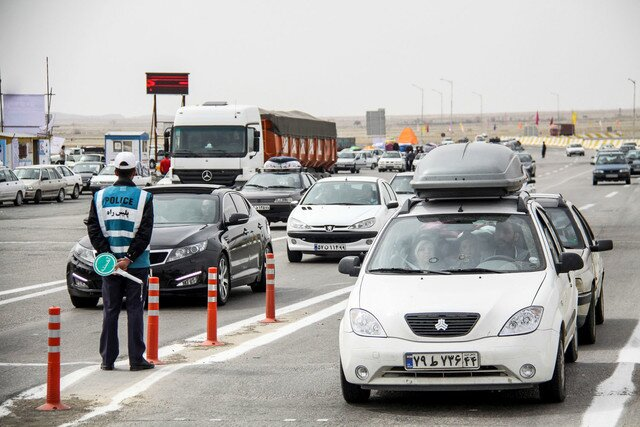

In [16]:
Image(image_path)

In [9]:
!python detect.py --source runs/target_image.jpg --conf 0.4 --weights runs/plate-detection-weights.pt --save-txt --name target_image

detect: weights=['runs/plate-detection-weights.pt'], source=runs/target_image.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=target_image, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
fatal: cannot change to 'D:\learning\EE': No such file or directory
YOLOv5  2022-6-28 Python-3.9.6 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20852934 parameters, 0 gradients
image 1/1 D:\learning\EE Courses\Deep learning (Dr.Hadadi)\TA\Exercise\Project\Final\yolov5\runs\target_image.jpg: 448x640 1 license, Done. (0.026s)
Speed: 0.0ms pre-process, 26.0ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\target_image
1 lab

In [10]:
from PIL import Image

with open(first_label) as f:
    char = f.read()

char = [list(map(float, i.strip().split(' '))) for i in char.strip().split('\n')]
for l in char:
    label, x_center, y_center, width, height = l
    img = Image.open(image_path)
    w_pic, h_pic = img.size
    
    w = width * w_pic
    h = height * h_pic
    
    w_1 = int((x_center * w_pic) - w/2)
    h_1 = int((y_center * h_pic) - h/2)
    
    w_2 = int(w_1 + w)
    h_2 = int(h_1 + h)
    
#     print(w_1, h_1, w_2, h_2)
    img_f = img.crop((w_1, h_1, w_2, h_2))
#     img_f.show()
    img_f.save("runs/target_image_final.jpg")

In [11]:
!python detect.py --source runs/target_image_final.jpg --conf 0.4 --weights runs/plate-char-detection-weights.pt --save-txt --name target_image_final --hide-conf

detect: weights=['runs/plate-char-detection-weights.pt'], source=runs/target_image_final.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=target_image_final, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=True, half=False, dnn=False
fatal: cannot change to 'D:\learning\EE': No such file or directory
YOLOv5  2022-6-28 Python-3.9.6 torch-1.9.0+cu111 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
YOLOv5m summary: 290 layers, 20998410 parameters, 0 gradients
image 1/1 D:\learning\EE Courses\Deep learning (Dr.Hadadi)\TA\Exercise\Project\Final\yolov5\runs\target_image_final.jpg: 160x640 1 3, 2 4s, 1 6, 2 7s, 1 9, 1 25, Done. (0.016s)
Speed: 0.0ms pre-process, 16.0ms inference, 4.0ms NMS per image at shape (1, 3, 640, 640)
Res

In [12]:
second_label = first_label = "runs/detect/target_image_final/labels/target_image_final.txt"
with open(first_label) as f:
    char = f.read()

char = [list(map(float, i.strip().split(' '))) for i in char.strip().split('\n')]
pelak = []

for l in char:
    label, x_center, y_center, width, height = l
    pelak.append((x_center, plate_char[int(label)]))

pelak = sorted(pelak, key = lambda i:i[0])
pelak = [i[1] for i in pelak]

for ch in pelak:
    print(ch)

7
9
ط
7
3
6
4
4
